In [2]:
### PREREQUISITIES

### these are basic and should go easy
import sys
import pandas as pd
import numpy as np
import os
import string as str_p
import collections
import regex as re

### NLTK  - natural language processing 
###this requires installation
import nltk
from nltk.collocations import *

### Beautiful Soup and Urllib
### for scrapping of web data and parsing xml files

from urllib.request import urlopen


from bs4 import BeautifulSoup

### for network analysis
import networkx as nx

### for visualization
import plotly.plotly as py
import plotly.graph_objs as go
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io as pio
init_notebook_mode(connected=True)

In [3]:
### parse the xml
with open("data/data_EN/JMP_TEI_preklady_EN/EHRI-ET-JMP005_EN.xml") as file:
    soup = BeautifulSoup(file, "html.parser")

In [4]:
def CapCol(title):
    name_parts = title.replace("-","_").split("_")
    name_parts_new = []
    for part in name_parts:
        if part in ["of", "and", "to", "der", "na", "pri", "in", "am"]: ### other words can be added in the future
            name_parts_new.append(part)
        else:
            if (len(part) > 1) and (part[1].islower() is False):
                name_parts_new.append(part)
            else:
                name_parts_new.append(part.capitalize())
    return "_".join(name_parts_new)

concepts_and_agents = pd.read_csv("data/concepts-and-historical-agents-d2FelqqHyQ.csv", names=["key", "name", "lang", "n3", "n4", "n5", "type"])
concepts_and_agents = concepts_and_agents[concepts_and_agents["lang"]=="eng"]

def concepts_and_agents_replacer(string):
    string = string.replace(",", "")
    string = "_".join(string.split())
    string = string.replace("_concentration_camp", "")
    string = string.partition("_(")[0]
    string = string.replace("__", "_")
    return CapCol(string)
concepts_and_agents["name_modified"] = concepts_and_agents.apply(lambda  row: concepts_and_agents_replacer(row["name"]), axis=1)

def pers_id_generator(row_key):
    if "iti-" in row_key:
        pers_id = row_key.partition("iti-")[2]
    else:
        pers_id = row_key.partition("terms-")[2]
    return pers_id
concepts_and_agents["pers_id"] = concepts_and_agents.apply(lambda row: pers_id_generator(row["key"]), axis=1)
                                                                                         
concepts_and_agents.set_index("pers_id", inplace=True) 
concepts_and_agents.head(10)

,key,name,lang,n3,n4,n5,type,name_modified
pers_id,,,,,,,,
140,ehri_terms-140,Nazi Physicians,eng,NaN,NaN,NaN,EHRI Terms,Nazi_Physicians
139,ehri_terms-139,Jewish armed resistance,eng,NaN,NaN,NaN,EHRI Terms,Jewish_Armed_Resistance
137,ehri_terms-137,"Registries of Births, Deaths and Marriages",eng,NaN,NaN,NaN,EHRI Terms,Registries_of_Births_Deaths_and_Marriages
134,ehri_terms-134,War trauma,eng,NaN,NaN,NaN,EHRI Terms,War_Trauma
135,ehri_terms-135,Concerts,eng,NaN,NaN,NaN,EHRI Terms,Concerts
136,ehri_terms-136,Cabaret,eng,NaN,NaN,NaN,EHRI Terms,Cabaret
132,ehri_terms-132,Victims,eng,NaN,NaN,NaN,EHRI Terms,Victims
133,ehri_terms-133,War foster children,eng,NaN,NaN,NaN,EHRI Terms,War_Foster_Children
130,ehri_terms-130,Strikes,eng,NaN,NaN,NaN,EHRI Terms,Strikes


In [5]:
def camps_replacer(string):
    string = string.replace(",", "")
    string = string.replace(".","")
    string = string.replace("-", "_")
    string = "_".join(string.split())
    string = string.replace("_concentration_camp", "")
    return string

camps = pd.read_csv("data/ehri-camps-x4coOEPiJh.csv", names=["id", "lang", "name"])
camps = camps[camps["lang"]=="eng"]
camps["id_numbers"] = camps.apply(lambda  row: str(row["id"]).partition(".eu/")[2], axis=1)
camps["name_modified"] = camps.apply(lambda  row: camps_replacer(row["name"]), axis=1)
camps.set_index("id_numbers", inplace=True)
print(camps["name_modified"].tolist()[:100])

['München_Allach_(Porzellanmanufaktur)', 'Concentration_Camp_Gusen_I', 'Manfredonia', 'Ksabi', 'Kerestinec', 'Oelsnitz_im_Erzgebirge', 'Meppen_Dalum', 'Videle', 'Cheragas', 'Alexandrodar', 'Komorowo', 'Rouillé', 'Aosta', 'Mezzo_Island', 'Teiş_Târgovişte', 'Zschorlau', 'Béni_Abbès', 'Hulievca', 'Kobylany', 'Osthofen', 'Hirschberg_Arbeitskommando', 'Jastrebarsko', 'Berezdov', "Landsberg_Dynamit_AG_men's", 'Gorna_Oryahovitsa', 'Lauria', 'La_Morellerie', 'Stollberg_Hoheneck', 'Sospello', 'Krobów', 'Mostovoi', 'Zillerthal_Erdmannsdorf', 'Buqbuq', 'Hirschberg_Buchwald_Hohenwiese', 'Mantua', 'Mulsanne', 'Weißenfels', 'Farfa', 'Fort_de_Queuleu', 'Koty', 'Suha_Verba', 'Suha_Balca', 'Biłgoraj', 'Bamberg', 'Pukë', 'Buzet_sur_Baïse', 'Bausnitz', 'Koulikoro', 'Anafi_Island', 'Alexisdorf', 'Moldavca', 'Berlin_Tiergarten', 'Zlarino', 'Újvidék', "Landsberg_Dynamit_AG_women's", 'Mecheria', 'Mediouna', 'Storojineţ', 'Kruszyna', 'Milbertshofen', 'De_Vecht', 'Slivina', 'Polish_Youth_Custody_Camp_of_the_Se

In [6]:
camps.head(5)

,id,lang,name,name_modified
id_numbers,,,,
60,http://data.ehri-project.eu/60,eng,München-Allach (Porzellanmanufaktur) concentra...,München_Allach_(Porzellanmanufaktur)
70,http://data.ehri-project.eu/70,eng,Concentration Camp Gusen I,Concentration_Camp_Gusen_I
589,http://data.ehri-project.eu/589,eng,Manfredonia concentration camp,Manfredonia
2501,http://data.ehri-project.eu/2501,eng,Ksabi concentration camp,Ksabi
2852,http://data.ehri-project.eu/2852,eng,Kerestinec concentration camp,Kerestinec


In [7]:
def ghettos_replacer(string):
    string = string.replace(",", "")
    string = "_".join(string.split())
    string = string.replace("-", "_")
    string = string.replace("_Ghetto", "")
    return string

ghettos = pd.read_csv("data/ehri-ghettos-znL7F0s3PB.csv", names=["id", "lang", "name"])
ghettos = ghettos[ghettos["lang"]=="eng"]
ghettos["id_numbers"] = ghettos.apply(lambda  row: str(row["id"]).partition("ghettos/")[2], axis=1)
ghettos["name_modified"] = ghettos.apply(lambda  row: ghettos_replacer(row["name"]), axis=1)
ghettos.set_index("id_numbers", inplace=True)
print(ghettos["name_modified"].tolist()[:100])


['Grodzisk_Mazowiecki', 'Pliskov', 'Pionki', 'Grybów', 'Wolbórz', 'Budsław', 'Iaryshev', 'Narew', 'Narodichi', 'Wołczyn', 'Działoszyce', 'Iarmolintsy', 'Kalius', 'Rumšiškės', 'Plungė', 'Pogost', 'Ruzhin', 'Gudogaj', 'Gulbene', 'Pilica', 'Dubienka', 'Urech’e', 'Lipovets', 'Yessentuki', 'Liuban’', 'Żabinka', 'Novozlatopol’', 'Holszany', 'Buki', 'Elizovo', 'Bychawa', 'Urzedów', 'Dziewieniszki', 'Bukaczowce', 'Nal’chik', 'Elista', 'Zen’kov', 'Lokhvitsa', 'Batakiai', 'Uzliany', 'Krasilov', 'Chocienczyce', 'Starobin', 'Dzhulinka', 'Nikolaev', 'Wołpa', 'Dzerzhinsk', 'Ianov', 'Novaia_Praga', 'Linkuva', 'Dzerzhinsk', 'Horodno', 'Zaklików', 'Novozybkov', 'Begoml’', 'Ustrzyki_Dolne', 'Zaostrowicze', 'Obchuga', 'Bazaliia', 'Liubavichi', 'Koziany', 'Utena', 'Łochów', 'Okuniew', 'Uvarovichi', 'Bauska', 'Ciechocinek', 'Staraia_Ushitsa', 'Kamiensk', 'Seda', 'Chashniki', 'Stromiec', 'Velike_Luki', 'Krucha', 'Mariampol', 'Baranów_nad_Wieprzem', 'Sedziszów_Małopolski', 'Fastov', 'Bykhov', 'Kamionka_Strum

In [8]:
def person_replacer(string):
    string = "_".join(string.split())
    string = string.replace(".","")
    string = string.replace(",","")
    return string

ehri_persons = pd.read_csv("data/ehri-persons--names-and-dates-daxX7P1AIn.csv", names=["id_and_type", "name", "date", "birth", "death"])
ehri_persons["id"] = ehri_persons.apply(lambda row: row["id_and_type"].partition("pers-")[2], axis=1)
ehri_persons.set_index("id", inplace=True)
ehri_persons["name_modified"] = ehri_persons.apply(lambda  row: person_replacer(row["name"]), axis=1)

In [9]:
ehri_persons.head(5)

,id_and_type,name,date,birth,death,name_modified
id,,,,,,
27068785,ehri_pers-27068785,Walter Braemer,07-01-1883 / 13-06-1955,1883-01-07,1955-06-13,Walter_Braemer
27068784,ehri_pers-27068784,Grünvald Fülöp,1887-1964,NaN,NaN,Grünvald_Fülöp
27068783,ehri_pers-27068783,"Miliband, Ralph",NaN,1924-01-07,1994-05-21,Miliband_Ralph
003088,ehri_pers-003088,Samu Csobádi,1879–19?,NaN,NaN,Samu_Csobádi
003087,ehri_pers-003087,Károly Wilhelm,1886–1951,NaN,NaN,Károly_Wilhelm


In [10]:
ehri_persons.at["000569","name_modified"]

'dr_Josef_Mengele'

# Raw text cleaning

In [24]:
### parse the xml
with open("data/data_EN/JMP_TEI_preklady_EN/EHRI-ET-JMP012_EN.xml") as file:
    soup = BeautifulSoup(file, "html.parser")

In [30]:
def replacer_place(string):
    return re.split(r'\.html', re.split(r'\.org\/', string)[1])[0].replace("/", "_")
def camp_name_returner(place_ref):
    camp_id = place_ref.partition("ehri_camps-")[2]
    name_modified = camps.at[camp_id, "name_modified"]
    if isinstance(name_modified, np.ndarray):
        name_modified = name_modified[0]
    return name_modified
def ghettos_name_returner(place_ref):
    ghettos_id = place_ref.partition("ehri_ghettos-")[2]
    return ghettos.at[ghettos_id, "name_modified"]
place_names = []
camp_names = []
ghetto_names = []
for place in soup.find_all("placename"):
    place_ref = place.get("ref")
    if "geonames" in place_ref:
        place_name_modified = replacer_place(place_ref).partition("_")[2]
        place_name_modified = CapCol(place_name_modified.replace("-", "_"))
        place_names.append([place.get_text(), place_ref, place_name_modified])
        place.string = place_name_modified
    if "ehri_camps-" in place_ref:
        camp_names.append([place.get_text(), place_ref, camp_name_returner(place_ref)])
        place.string = camp_name_returner(place_ref)
    if "ehri_ghettos-" in place_ref:
        ghetto_names.append([place.get_text(), place_ref, ghettos_name_returner(place_ref)])
        place.string = ghettos_name_returner(place_ref)

In [31]:
camp_names

[['Auschwitz_II_Birkenau',
  'https://portal.ehri-project.eu/keywords/ehri_camps-2',
  'Auschwitz_II_Birkenau'],
 ['Mauthausen',
  'https://portal.ehri-project.eu/keywords/ehri_camps-570',
  'Mauthausen'],
 ['Auschwitz_II_Birkenau',
  'https://portal.ehri-project.eu/keywords/ehri_camps-2',
  'Auschwitz_II_Birkenau'],
 ['Mauthausen',
  'https://portal.ehri-project.eu/keywords/ehri_camps-570',
  'Mauthausen'],
 ['', 'https://portal.ehri-project.eu/keywords/ehri_camps-585', 'Gusen']]

In [13]:
def persname_generator(original_name, persname_ref):
    pers_id = persname_ref.partition("-iti-")[2]
    try:
        name_modified = concepts_and_agents.at[pers_id, "name_modified"]
    except:
        name_modified = original_name
    if isinstance(name_modified, np.ndarray):
        name_modified = name_modified[0]
    return name_modified

persnames = []
for persname in soup.find_all("persname"):
    persname_ref = persname.get("ref")
    persname_original = persname.get_text()
    if persname_ref != None:
        if "-iti-" in persname_ref:
            persnames.append([persname.get_text(), "iti", persname_generator(persname_original, persname_ref)])
            persname.string = persname_generator(persname_original, persname_ref)
        if "ehri_pers-" in persname_ref:
            person_modified = ehri_persons.at[persname_ref.partition("pers-")[2], "name_modified"]
            persnames.append([persname.get_text(), "ehri_pers", person_modified])
            persname.string = person_modified
        if "ehri_et" in persname_ref: 
            person_modified = CapCol(persname_ref.partition("ehri_et_")[2])
            persnames.append([persname.get_text(), "ehri_et", person_modified])
            persname.string = person_modified

In [14]:
def terms_generator(term_ref):
    term_id = term_ref.partition("ehri_terms-")[2]
    try:
        term_modified = concepts_and_agents.at[term_id, "name_modified"]
        if isinstance(term_modified, np.ndarray): ### if there is more meanings
            term_modified = term_modified[0]    
        return term_modified
    except:
        pass

terms_tags = []
for term in soup.find_all("term"):
    term_ref = term.get("ref")
    if (term_ref != None) and ("ehri_terms-" in term_ref):
        terms_tags.append([term.get_text(), term_ref, terms_generator(term_ref)])
        try: 
            term.string = terms_generator(term_ref)
        except:
            pass

In [374]:
persnames_list = list(set([element[2] for element in persnames]))
places_list = list(set([element[2] for element in place_names]))
camps_list = list(set([element[2] for element in camp_names]))
ghettos_list = list(set([element[2] for element in ghetto_names]))
terms_list = list(set([element[2] for element in terms_tags]))
tags_list = persnames_list + places_list + camps_list + ghettos_list + terms_list

In [375]:
### extract raw text from the "soup" as a list of paragraphs
raw_text = []
all_p = soup.body.find_all("p")
for p in all_p:
    raw_text.append(p.get_text())

In [376]:
### make string from the list of paragraphs
raw_text_str = " ".join(raw_text)
raw_text_str[:200]

'Statement Written in\xa0Zeilsheim\nDisplaced_Persons_Camps near Frankfurt_am_Main on 3. and 4.\n          11. 1945 with\xa0Przewoznik_Hermann, Fuchs_Slomo, and\n          Schwarzwald_Chaim about the Concentrat'

In [378]:
### remove newlines characters
cleaned_text_1  = " ".join(raw_text_str.splitlines())
cleaned_text_2 = cleaned_text_1.replace("\xa0", " ")
if "  " in cleaned_text_2:
    cleaned_text_3 = re.sub(r'\s\s+', ' ', cleaned_text_2)

In [379]:
### remove punctuation
for character in str_p.punctuation:
    if (character != "_") and (character != "-"):
        cleaned_text_3 = cleaned_text_3.replace(character, "")
cleaned_text_list4 = [word for word in cleaned_text_3.split()]
### make lower words
cleaned_text_list = []
for word in cleaned_text_list4:
    if word in tags_list:
        cleaned_text_list.append(word)
    else:
        cleaned_text_list.append(word.lower())
print(cleaned_text_list[:100])

['statement', 'written', 'in', 'Zeilsheim', 'Displaced_Persons_Camps', 'near', 'Frankfurt_am_Main', 'on', '3', 'and', '4', '11', '1945', 'with', 'Przewoznik_Hermann', 'Fuchs_Slomo', 'and', 'Schwarzwald_Chaim', 'about', 'the', 'Concentration_Camps', 'Auschwitz_II_Birkenau', 'Przewoznik_Hermann', 'born', '16', '1', '1914', 'in', 'Plonsko', 'Camp_Inmates', 'of', 'the', 'Concentration_Camps', 'Auschwitz_II_Birkenau', 'Camp_Inmates', 'number', '84256', 'Oranienburg', 'Sachsenhausen', 'Kaufering_II', 'Dachau', 'Fuchs_Slomo', 'born', '3', '5', '1908', 'was', 'Camp_Inmates', 'in', 'Auschwitz_II_Birkenau', 'Camp_Inmates', 'number', '84033', 'Oranienburg', 'Flossenbürg', 'Dachau', 'Schwarzwald_Chaim', 'born', '12', '11', '1921', 'in', 'Plonsko', 'Camp_Inmates', 'in', 'Auschwitz', '60423', 'Auschwitz_II_Birkenau', 'Oranienburg', 'Sachsenhausen', 'Dachau', 'all', 'three', 'are', 'currently', 'in', 'the', 'Zeilsheim', 'Displaced_Persons_Camps', 'near', 'Frankfurt_am_Main', 'we', 'Forced_Labour', 'i

# Lemmatization and POS-tagging

In [380]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lem(word):
    wordnet_lemmatizer.lemmatize(word)

In [381]:
### lemmatize as verbs
lemmatized_document = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in cleaned_text_list]
### lemmatize as nouns
lemmatized_document = [wordnet_lemmatizer.lemmatize(word, pos="n") for word in lemmatized_document]
print(lemmatized_document[:100])

['statement', 'write', 'in', 'Zeilsheim', 'Displaced_Persons_Camps', 'near', 'Frankfurt_am_Main', 'on', '3', 'and', '4', '11', '1945', 'with', 'Przewoznik_Hermann', 'Fuchs_Slomo', 'and', 'Schwarzwald_Chaim', 'about', 'the', 'Concentration_Camps', 'Auschwitz_II_Birkenau', 'Przewoznik_Hermann', 'bear', '16', '1', '1914', 'in', 'Plonsko', 'Camp_Inmates', 'of', 'the', 'Concentration_Camps', 'Auschwitz_II_Birkenau', 'Camp_Inmates', 'number', '84256', 'Oranienburg', 'Sachsenhausen', 'Kaufering_II', 'Dachau', 'Fuchs_Slomo', 'bear', '3', '5', '1908', 'be', 'Camp_Inmates', 'in', 'Auschwitz_II_Birkenau', 'Camp_Inmates', 'number', '84033', 'Oranienburg', 'Flossenbürg', 'Dachau', 'Schwarzwald_Chaim', 'bear', '12', '11', '1921', 'in', 'Plonsko', 'Camp_Inmates', 'in', 'Auschwitz', '60423', 'Auschwitz_II_Birkenau', 'Oranienburg', 'Sachsenhausen', 'Dachau', 'all', 'three', 'be', 'currently', 'in', 'the', 'Zeilsheim', 'Displaced_Persons_Camps', 'near', 'Frankfurt_am_Main', 'we', 'Forced_Labour', 'in', 

In [382]:
### generate POS-tags
postagged_document = nltk.pos_tag(lemmatized_document, lang="eng")
print(postagged_document[:100])

[('statement', 'NN'), ('write', 'NN'), ('in', 'IN'), ('Zeilsheim', 'NNP'), ('Displaced_Persons_Camps', 'NNP'), ('near', 'IN'), ('Frankfurt_am_Main', 'NNP'), ('on', 'IN'), ('3', 'CD'), ('and', 'CC'), ('4', 'CD'), ('11', 'CD'), ('1945', 'CD'), ('with', 'IN'), ('Przewoznik_Hermann', 'NNP'), ('Fuchs_Slomo', 'NNP'), ('and', 'CC'), ('Schwarzwald_Chaim', 'NNP'), ('about', 'IN'), ('the', 'DT'), ('Concentration_Camps', 'NNP'), ('Auschwitz_II_Birkenau', 'NNP'), ('Przewoznik_Hermann', 'NNP'), ('bear', 'VBP'), ('16', 'CD'), ('1', 'CD'), ('1914', 'CD'), ('in', 'IN'), ('Plonsko', 'NNP'), ('Camp_Inmates', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('Concentration_Camps', 'NNP'), ('Auschwitz_II_Birkenau', 'NNP'), ('Camp_Inmates', 'NNP'), ('number', 'NN'), ('84256', 'CD'), ('Oranienburg', 'NNP'), ('Sachsenhausen', 'NNP'), ('Kaufering_II', 'NNP'), ('Dachau', 'NNP'), ('Fuchs_Slomo', 'NNP'), ('bear', 'VBP'), ('3', 'CD'), ('5', 'CD'), ('1908', 'CD'), ('be', 'VB'), ('Camp_Inmates', 'NNPS'), ('in', 'IN'), ('Auschw

In [383]:
### check unique values of TAGS
print(set([pos_tagged[1] for pos_tagged in postagged_document]))

{'VB', 'MD', 'PRP$', '$', 'WRB', 'RB', 'JJS', 'WP', 'CC', 'VBZ', 'JJR', 'NNS', 'EX', 'NNPS', 'RBR', 'NNP', 'VBG', 'VBP', 'DT', 'TO', 'NN', 'CD', 'WDT', 'RBS', 'JJ', 'VBN', 'IN', 'PRP', 'PDT', 'RP', 'FW', 'VBD'}


In [384]:
### to subselect only nouns, verbs, adjectives and tagged words
document_filtered = []
postagged_document_filtered = []
for pos_tuple in postagged_document:
    if (pos_tuple[1] in ["NN", "NNP", "NNS", "JJ", "JJR", "JJS", 'VB', 'VBD', 'VBG','VBN', 'VBP','VBZ']) or (pos_tuple[0] in tags_list):
        ### ignore some words
        if pos_tuple[0] not in ['–', "ie", "i", "be"]:
            postagged_document_filtered.append(pos_tuple)
            document_filtered.append(pos_tuple[0])    
print(document_filtered[:30])

['statement', 'write', 'Zeilsheim', 'Displaced_Persons_Camps', 'Frankfurt_am_Main', 'Przewoznik_Hermann', 'Fuchs_Slomo', 'Schwarzwald_Chaim', 'Concentration_Camps', 'Auschwitz_II_Birkenau', 'Przewoznik_Hermann', 'bear', 'Plonsko', 'Camp_Inmates', 'Concentration_Camps', 'Auschwitz_II_Birkenau', 'Camp_Inmates', 'number', 'Oranienburg', 'Sachsenhausen', 'Kaufering_II', 'Dachau', 'Fuchs_Slomo', 'bear', 'Camp_Inmates', 'Auschwitz_II_Birkenau', 'Camp_Inmates', 'number', 'Oranienburg', 'Flossenbürg']


In [385]:
len(document_filtered)

1876

In [386]:
nltk.FreqDist(document_filtered).most_common(100)

[('Gas_Chambers', 83),
 ('Camp_Inmates', 58),
 ('Women', 47),
 ('Auschwitz_II_Birkenau', 46),
 ('Transports', 42),
 ('SS_Men', 35),
 ('send', 30),
 ('Selection', 29),
 ('arrive', 27),
 ('have', 22),
 ('Concentration_Camps', 19),
 ('take', 18),
 ('Men', 18),
 ('Forced_Labour', 16),
 ('Murder', 16),
 ('Underground', 16),
 ('time', 15),
 ('Zyklon_B', 14),
 ('sauna', 12),
 ('transport', 12),
 ('ii', 12),
 ('number', 11),
 ('Children', 11),
 ('Clothings', 11),
 ('Hungary', 11),
 ('polish', 10),
 ('jew', 10),
 ('order', 10),
 ('theresienstadt', 10),
 ('Death', 10),
 ('head', 10),
 ('begin', 9),
 ('small', 9),
 ('so-called', 8),
 ('carry', 8),
 ('block', 8),
 ('didn’t', 8),
 ('january', 7),
 ('Physicians', 7),
 ('know', 7),
 ('rest', 7),
 ('Kapos', 7),
 ('day', 7),
 ('march', 7),
 ('Republic_of_France', 7),
 ('Labour_Camps', 7),
 ('lead', 7),
 ('help', 7),
 ('dr_Josef_Mengele', 6),
 ('others', 6),
 ('go', 6),
 ('other', 6),
 ('german', 6),
 ('throw', 6),
 ('russian', 6),
 ('do', 6),
 ('operat

In [387]:
nouns = list(set([element[0] for element in postagged_document_filtered if element[1].startswith("NN")]))
verbs = list(set([element[0] for element in postagged_document_filtered if element[1].startswith("V")]))

# Wordcloud

In [388]:
### wordcloud
### based on https://www.datacamp.com/community/tutorials/wordcloud-python

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18.0, 12.0)

In [389]:
wordcloud = WordCloud(max_font_size=30, max_words=200, background_color="white").generate(" ".join(document_filtered))
class SimpleGroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}
        self.default_color = default_color
    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)
color_to_words = {
    "green" : terms_list,
    "red" : camps_list,
    "orange" : ghettos_list,
    "blue" : persnames_list}
default_color = "gray"
grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)
wordcloud.recolor(color_func=grouped_color_func)

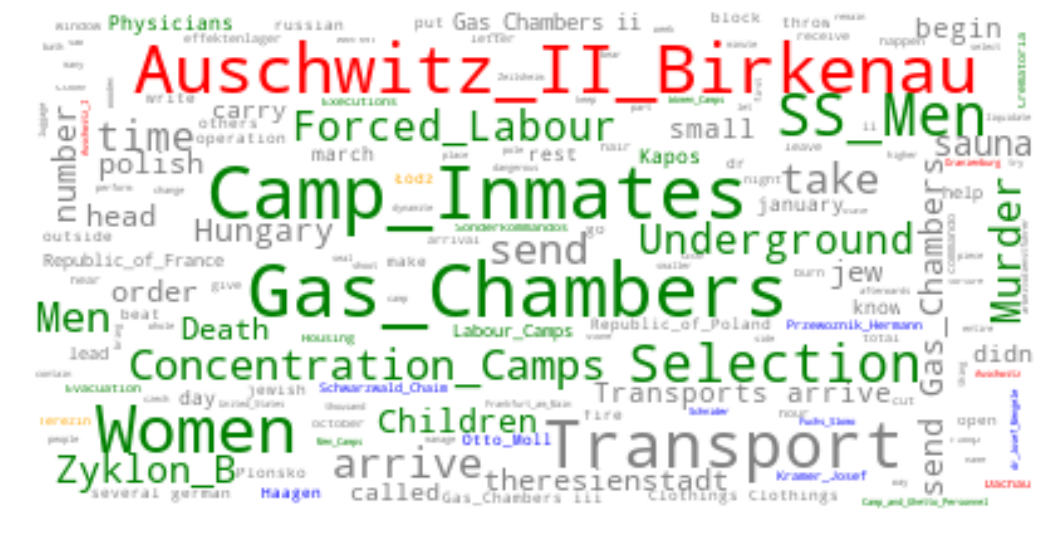

In [390]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()